# Introduction to neural network classification with tensorflow

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


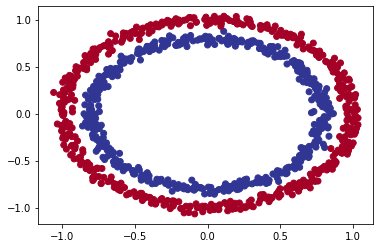

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
tf.random.set_seed(42)


model = tf.keras.Sequential([                             
  tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([                             
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
model.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.4700
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.4720
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4830
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4660
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5010
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5030
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4790
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(1000, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                         
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

history = model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000


[0.0016530327266082168, 1.0]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


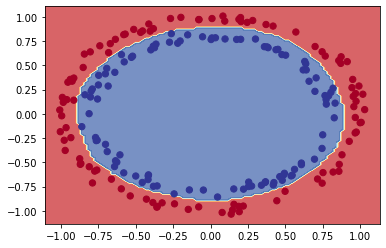

In [ ]:
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                         
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_3.fit(X_train, y_train, epochs=30, verbose=0)

In [ ]:
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 1.0000


[0.030255937948822975, 1.0]

Text(0.5, 0, 'epochs')

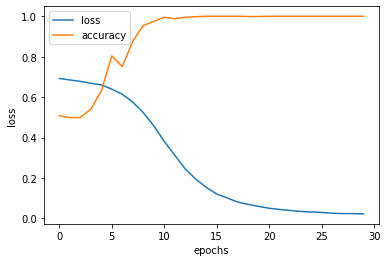

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),                             
  tf.keras.layers.Dense(10, activation="relu"),                             
  tf.keras.layers.Dense(1, activation="sigmoid")                             
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-5 * 10**(epoch/20))

history_5 = model_5.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7081 - accuracy: 0.4988 - lr: 1.0000e-05
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.4988 - lr: 1.1220e-05
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7076 - accuracy: 0.4988 - lr: 1.2589e-05
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.4988 - lr: 1.4125e-05
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.4988 - lr: 1.5849e-05
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.4988 - lr: 1.7783e-05
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.4988 - lr: 1.9953e-05
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7057 - accuracy: 0.4988 - lr: 2.2387e-05
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

Text(0.5, 0, 'epochs')

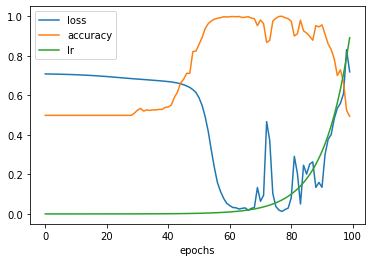

In [ ]:
pd.DataFrame(history_5.history).plot()
plt.xlabel("epochs")

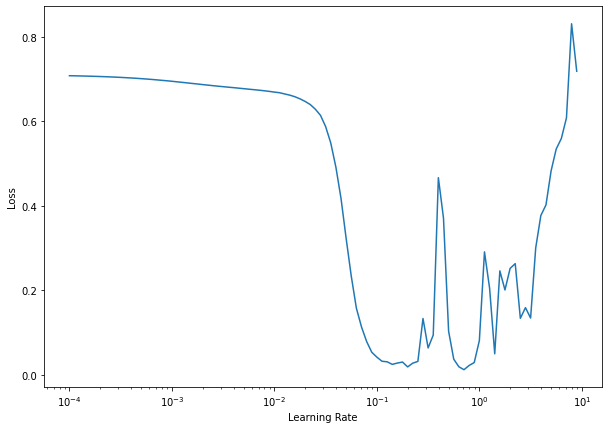

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss");


## Classification evaluation methods

* Accuracy
* Precision
* Recall
* F1
* Confusion matrix

In [ ]:
loss, accuracy = model_3.evaluate(X_test, y_test)
print("Loss:", loss)
print(f"Accuracy:, {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 1.0000
Loss: 0.030255937948822975
Accuracy:, 100.00%


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_3.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

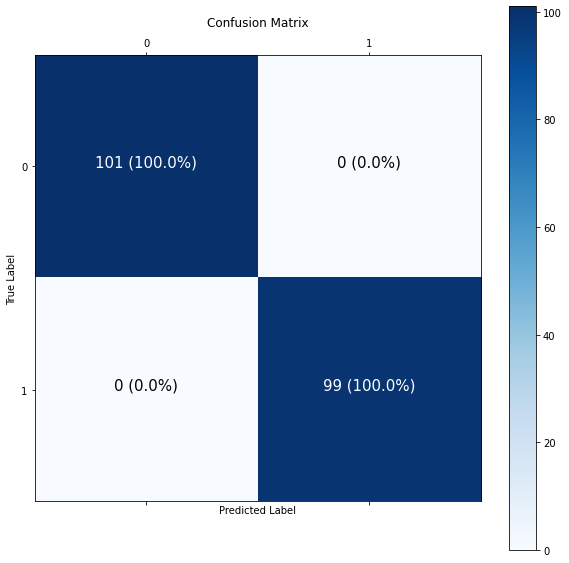

In [ ]:
import itertools

figsize = (10, 10)
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] #normalize cm
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max() + cm.min())/2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
cm_norm

array([[1., 0.],
       [0., 1.]])

# Working with multiclass classification

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_labels[0])
print(train_data[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

In [ ]:
train_data[0].shape

(28, 28)

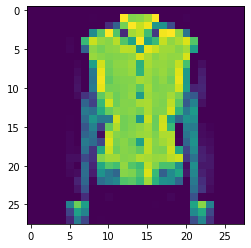

In [ ]:
plt.imshow(train_data[76])

In [ ]:
train_labels[76]

4

In [ ]:
class_names = [
  "T-shirt/top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Ankle boot"]

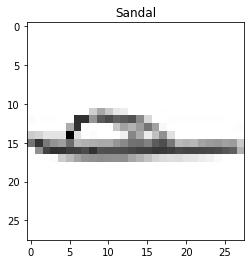

In [ ]:
idx = 30
plt.imshow(train_data[idx], cmap=plt.cm.binary)
plt.title(class_names[train_labels[idx]]);

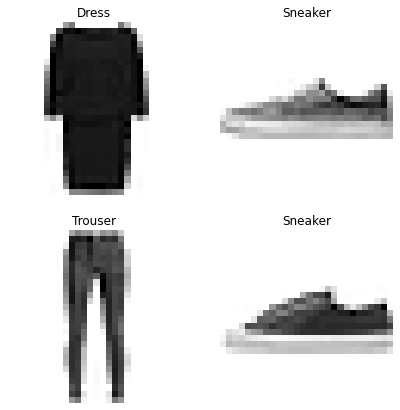

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_10.fit(train_data,
                                tf.one_hot(train_labels, 10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, 10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3502 - accuracy: 0.7074 - val_loss: 0.7438 - val_accuracy: 0.7420
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6881 - accuracy: 0.7655 - val_loss: 0.6932 - val_accuracy: 0.7877
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6318 - accuracy: 0.7878 - val_loss: 0.6930 - val_accuracy: 0.7658
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5771 - accuracy: 0.8074 - val_loss: 0.5794 - val_accuracy: 0.8020
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5311 - accuracy: 0.8200 - val_loss: 0.5867 - val_accuracy: 0.8138
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.8327 - val_loss: 0.5550 - val_accuracy: 0.8122
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4586 - accuracy: 0.8423 - val_loss: 0.5174 - val_accuracy:

In [ ]:
tf.one_hot(train_labels, 10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [ ]:
#Normalising data

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_11.fit(train_data_norm,
                            tf.one_hot(train_labels, depth=10),
                            epochs=10,
                            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4911 - accuracy: 0.8258 - val_loss: 0.4091 - val_accuracy: 0.8541
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3655 - accuracy: 0.8672 - val_loss: 0.4528 - val_accuracy: 0.8426
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3321 - accuracy: 0.8767 - val_loss: 0.3865 - val_accuracy: 0.8567
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3093 - accuracy: 0.8856 - val_loss: 0.3643 - val_accuracy: 0.8688
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2932 - accuracy: 0.8911 - val_loss: 0.3500 - val_accuracy: 0.8744
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2772 - accuracy: 0.8957 - val_loss: 0.3740 - val_accuracy: 0.8625
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.8999 - val_loss: 0.3647 - val_accuracy:

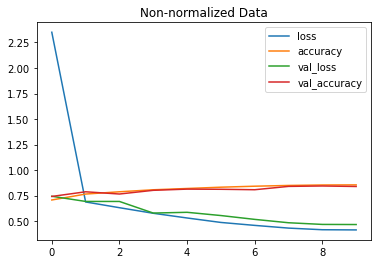

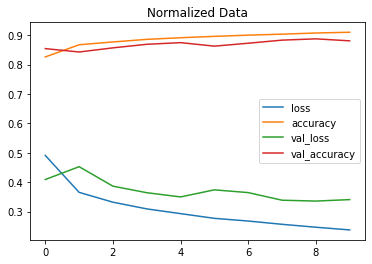

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data");

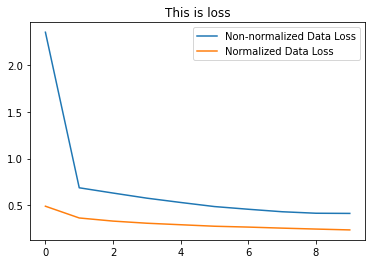

In [ ]:
plt.plot(range(len(non_norm_history.history["loss"])), non_norm_history.history["loss"], label="Non-normalized Data Loss")
plt.plot(range(len(norm_history.history["loss"])), norm_history.history["loss"], label="Normalized Data Loss")
plt.title("This is loss")
plt.legend()
plt.show()

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

lr_history = model_12.fit(train_data_norm,
                            tf.one_hot(train_labels, depth=10),
                            epochs=40,
                            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6896 - accuracy: 0.7786 - val_loss: 0.5062 - val_accuracy: 0.8223 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4503 - accuracy: 0.8443 - val_loss: 0.4604 - val_accuracy: 0.8362 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4072 - accuracy: 0.8569 - val_loss: 0.4343 - val_accuracy: 0.8422 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3782 - accuracy: 0.8669 - val_loss: 0.4070 - val_accuracy: 0.8547 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3593 - accuracy: 0.8717 - val_loss: 0.4081 - val_accuracy: 0.8518 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3426 - accuracy: 0.8771 - val_loss: 0.3987 - val_accuracy: 0.8562 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0, 0.5, 'Loss')

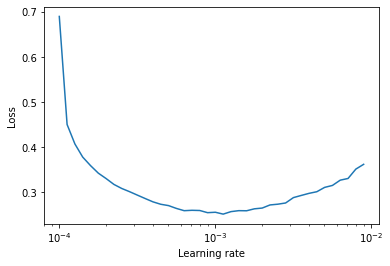

In [ ]:
lrs = 1e-4 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel('Loss')

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.0001),
                 metrics=["accuracy"])


final_history = model_14.fit(train_data_norm,
                            tf.one_hot(train_labels, depth=10),
                            epochs=40,
                            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6896 - accuracy: 0.7786 - val_loss: 0.5062 - val_accuracy: 0.8223
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4515 - accuracy: 0.8436 - val_loss: 0.4585 - val_accuracy: 0.8370
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4102 - accuracy: 0.8562 - val_loss: 0.4397 - val_accuracy: 0.8392
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3833 - accuracy: 0.8658 - val_loss: 0.4110 - val_accuracy: 0.8530
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3662 - accuracy: 0.8700 - val_loss: 0.4052 - val_accuracy: 0.8552
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3515 - accuracy: 0.8751 - val_loss: 0.4001 - val_accuracy: 0.8556
Epoch 7/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3400 - accuracy: 0.8794 - val_loss: 0.3995 - val_accuracy:

In [ ]:
model_11.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8805


[0.34089234471321106, 0.8805000185966492]

In [ ]:
model_14.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8878


[0.330982506275177, 0.8877999782562256]

In [ ]:
final_preds = model_14.predict(test_data_norm)


In [ ]:
final_preds[0].argmax()

9

In [ ]:
tf.math.argmax(final_preds, axis=1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
cm = confusion_matrix(tf.math.argmax(final_preds, axis=1), test_labels)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

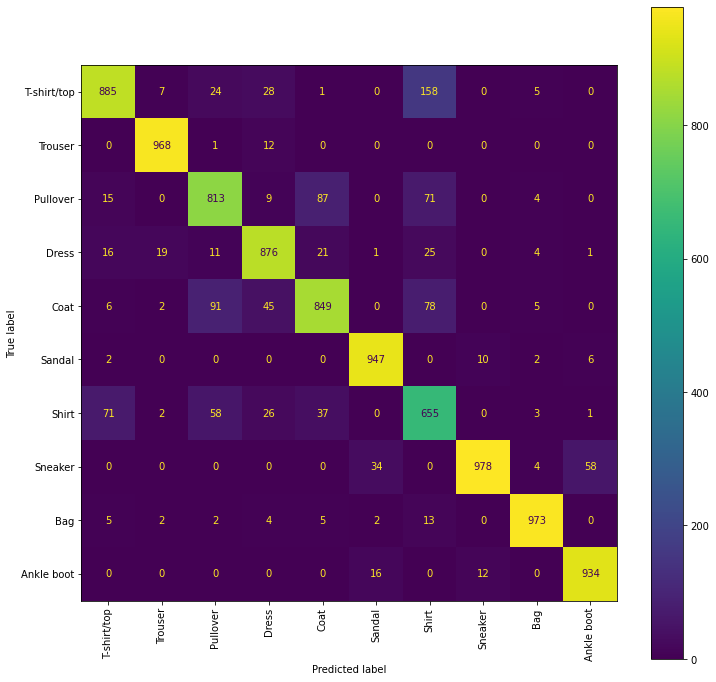

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
disp = ConfusionMatrixDisplay(cm, 
                              display_labels=class_names
                              )
disp.plot(ax=ax,
          xticks_rotation="vertical"          
          )
plt.show()

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
def plot_random_image(images, true_labels, classes, model=model_14):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict((target_image/255).reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

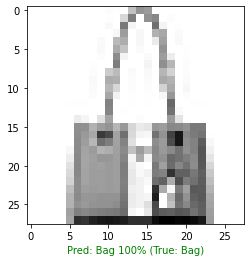

In [ ]:
plot_random_image(images=test_data, true_labels=test_labels, classes=class_names)